## Show the Results of the SQL-Queries

In [36]:
# Import packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Adjust default matplotlib settings
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'

### 1. Average Salary per Role

In [39]:
# Read csv
df_avg_salaries = pd.read_csv('./data/1_avg_salary.csv')

In [40]:
# Create new column to display salary in 1000s
df_avg_salaries['avg_yearly_salary_1000'] = df_avg_salaries['avg_yearly_salary'] / 1000

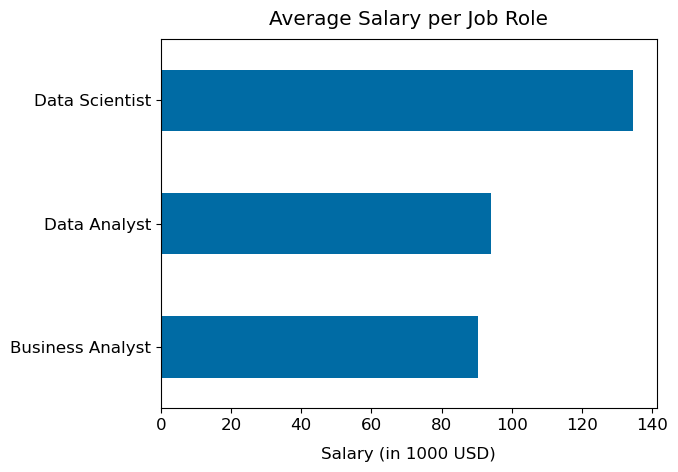

In [41]:
# Plot
df_avg_salaries.plot(x='role', y='avg_yearly_salary_1000', kind='barh',
                     xlabel='Salary (in 1000 USD)', ylabel='', legend='',
                     title='Average Salary per Job Role')
plt.savefig('plots/avg_salaries.png', dpi=300, bbox_inches='tight')

### 2. Top Skills per Role

In [42]:
# Read data
df_skills = pd.read_csv('./data/2_skills.csv')

In [43]:
# Group df by role and find 5 most common skills
df_skills_grouped = df_skills.groupby('role') \
    .apply(lambda x: x.nlargest(5, 'demand_count'), include_groups=False) \
    .reset_index(drop=False) \
    .drop('level_1', axis=1)

In [44]:
# Write helper function for plot
def plot_by_role(df_skills_grouped, role, ax, x_axis, x_label):
    temp = df_skills_grouped[df_skills_grouped['role'] == role].sort_values(by=x_axis, ascending=True)
    ax.barh(temp['skills'], temp[x_axis])
    ax.set_title(role)
    ax.set_xlabel(x_label)

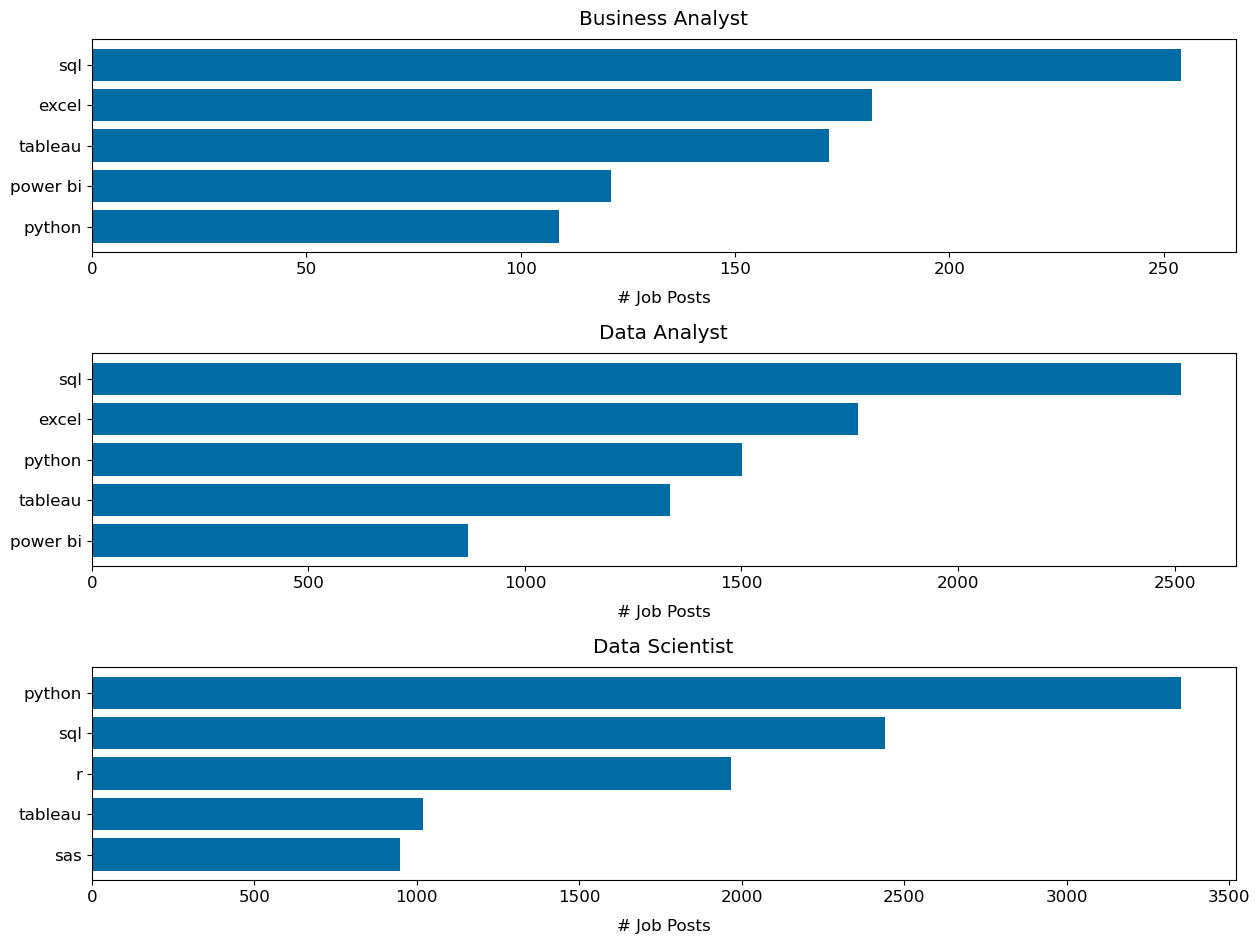

In [45]:
# Plot
_, axes = plt.subplots(3, 1)

for i, role in enumerate(df_skills_grouped['role'].unique()):
    plot_by_role(df_skills_grouped, role, axes[i], 'demand_count', '# Job Posts')

plt.tight_layout(rect=[-1, -1, 1, 1])
plt.savefig('plots/skills.png', dpi=300, bbox_inches='tight')

### 3. Top-Paying Skills per Role

In [46]:
# Read data
df_pay_skills = pd.read_csv('./data/3_top_paid_skills.csv')

In [47]:
# Group df by role and find 5 highest-paying skills
df_pay_skills_grouped = df_pay_skills.groupby('role') \
    .apply(lambda x: x.nlargest(5, 'avg_yearly_salary'), include_groups=False) \
    .reset_index(drop=False) \
    .drop('level_1', axis=1)

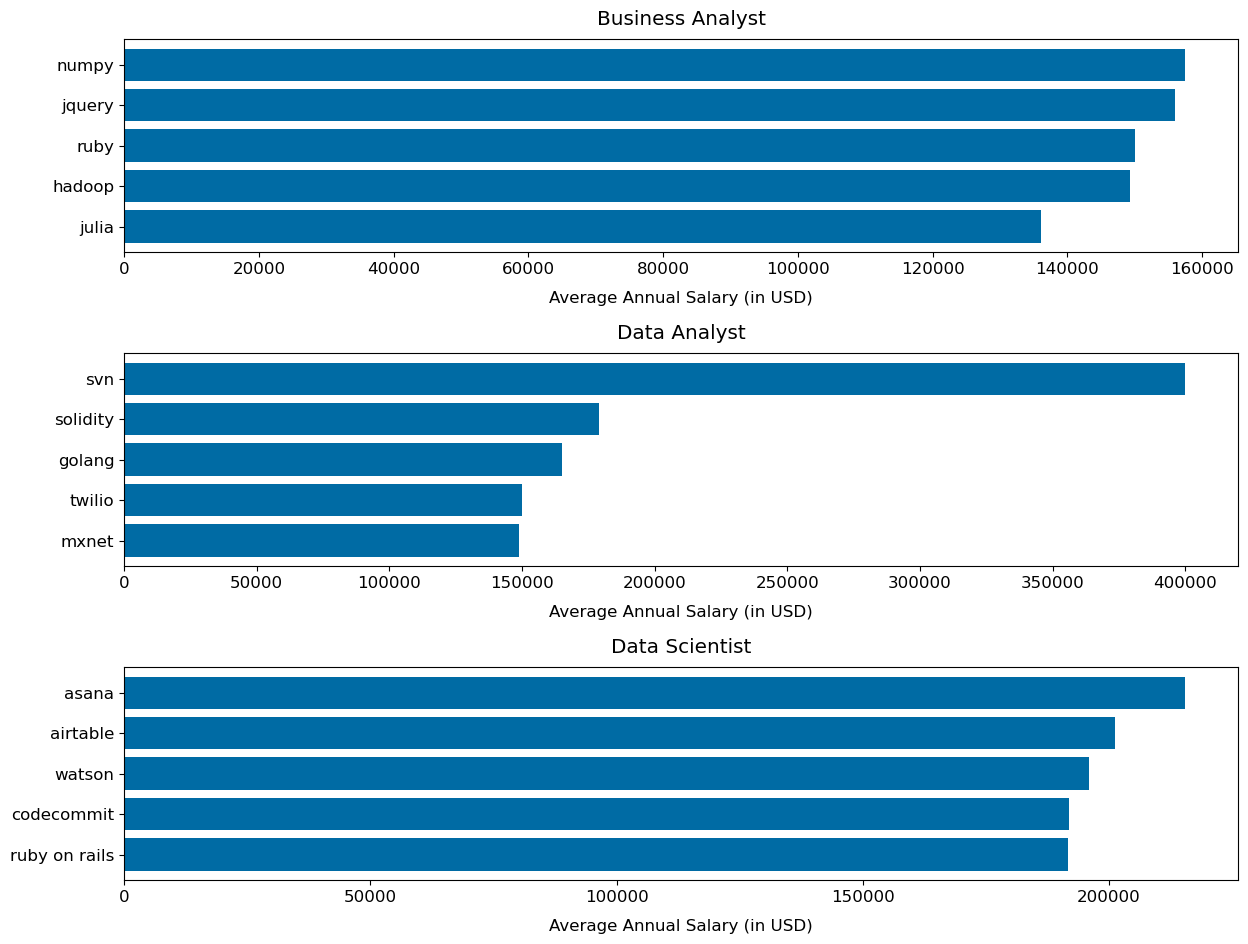

In [48]:
# Plot
_, axes = plt.subplots(3, 1)

for i, role in enumerate(df_pay_skills_grouped['role'].unique()):
    plot_by_role(df_pay_skills_grouped, role, axes[i], 'avg_yearly_salary', 'Average Annual Salary (in USD)')

plt.tight_layout(rect=[-1, -1, 1, 1])
plt.savefig('plots/top_paid_skills.png', dpi=300, bbox_inches='tight')

### 4. Optimal Skills

In [49]:
# Read data
df_optimal_skills = pd.read_csv('./data/4_optimal_skills.csv')

In [50]:
# Compute 90th percentile of demand_count per role and add it to df
df_percentiles = df_optimal_skills \
    .groupby('role')['demand_count'] \
    .apply(lambda x: np.percentile(x, 90))

df_optimal_skills = df_optimal_skills.join(df_percentiles, on='role', rsuffix='_90th')

In [51]:
# Filter only rows exceeding the 90th percentile
df_optimal_skills = df_optimal_skills[df_optimal_skills['demand_count'] > df_optimal_skills['demand_count_90th']] \
                        .drop('demand_count_90th', axis=1)

In [52]:
# Write function to display the optimal skills
def display_optimal_skills(role, df=df_optimal_skills):
    df = df[df['role'] == role] \
    .sort_values(by='avg_yearly_salary', ascending=False) \
    .drop('skill_id', axis=1) \
    .reset_index(drop=True)
    return df

In [53]:
# Optimal skills for Business Analysts
display_optimal_skills('Business Analyst').head()

,role,skills,demand_count,avg_yearly_salary
0,Business Analyst,snowflake,31,113611
1,Business Analyst,r,57,107081
2,Business Analyst,python,109,103194
3,Business Analyst,tableau,172,98297
4,Business Analyst,flow,43,95082


In [54]:
# Optimal Skills for Data Analysts
display_optimal_skills('Data Analyst').head()

,role,skills,demand_count,avg_yearly_salary
0,Data Analyst,snowflake,189,112746
1,Data Analyst,aws,242,106936
2,Data Analyst,looker,201,105154
3,Data Analyst,azure,269,104879
4,Data Analyst,python,1501,102023


In [55]:
# Optimal Skills for Data Scientists
display_optimal_skills('Data Scientist').head()

,role,skills,demand_count,avg_yearly_salary
0,Data Scientist,pytorch,419,143839
1,Data Scientist,spark,746,143445
2,Data Scientist,scala,295,142176
3,Data Scientist,tensorflow,483,141164
4,Data Scientist,scikit-learn,302,140625
